In [2]:
import sys
sys.path.append('/home/yzy/bioSIMS/code/analysis')
from utils import *
sys.path.append('/home/yzy/software/FIt-SNE')
from fast_tsne import fast_tsne
from SIMS_cluster2 import *
from SIMS_diff import *
from sklearn.neighbors import *
from sklearn.preprocessing import *
from importlib import reload
import kneed
import sys
import scanpy as sc
sys.path
sys.path.append('/home/yzy/software2/FINCH-Clustering/python/')
print(sys.path)
from finch import FINCH
from pyemd import *
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max
from skimage import data, img_as_float
sys.path.append('/home/yzy/software/gini')
from gini import *


from gensim.test.utils import datapath
from gensim import utils
import gensim.models

# from home.bioSIMS.code.analysis.utils import *
# from bioSIMS.code.analysis.utils import *

Using TensorFlow backend.
/home/yzy/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/yzy/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/yzy/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/yzy/anacond

['/data01/software/MATLAB/extern/engines/python/dist/matlab/engine/glnxa64', '', '/home/yzy/anaconda3/envs/tensorflow/lib/python3.6/site-packages', '/home/yzy/anaconda3/envs/tensorflow/lib/python36.zip', '/home/yzy/anaconda3/envs/tensorflow/lib/python3.6', '/home/yzy/anaconda3/envs/tensorflow/lib/python3.6/lib-dynload', '/home/yzy/.local/lib/python3.6/site-packages', '/home/yzy/.local/lib/python3.6/site-packages/scprep-0.11.0-py3.6.egg', '/home/yzy/anaconda3/envs/tensorflow/lib/python3.6/site-packages/Sphinx-1.5.6-py3.6.egg', '/home/yzy/anaconda3/envs/tensorflow/lib/python3.6/site-packages/spherecluster-0.1.5-py3.6.egg', '/data01/yzy/software/xy_python_utils', '/home/yzy/anaconda3/envs/tensorflow/lib/python3.6/site-packages/Sphinx-1.2.3-py3.6.egg', '/home/yzy/anaconda3/envs/tensorflow/lib/python3.6/site-packages/setuptools-27.2.0-py3.6.egg', '/home/yzy/anaconda3/envs/tensorflow/lib/python3.6/site-packages/openne-0.0.0-py3.6.egg', '/home/yzy/anaconda3/envs/tensorflow/lib/python3.6/site-

/home/yzy/software2/FINCH-Clustering/python/finch.py:13: UserWarning: pyflann not installed: No module named 'index'
  warnings.warn('pyflann not installed: {}'.format(e))


In [3]:
data_mat_filename_temp = '/home/yzy/bioSIMS/data/process/{0}/cut/rst/datamat.mat'
matter_list_filename_temp='/home/yzy/bioSIMS/data/process/{0}/preprocess/matters_candidate.pkl'

# data = 'SPE1'
# test_sample_temp = '/home/yzy/bioSIMS/data/process/{0}/preprocess/test_samples_718.mat'

data='20190115_liverfiber1_filter'
test_sample_temp = '/home/yzy/bioSIMS/data/process/{0}/preprocess/test_samples_198.mat'
# data='liver_hoechst_blood_ada'
# test_sample_temp = '/home/yzy/bioSIMS/data/process/{0}/preprocess/test_samples_114.mat'
# data = '20190303_liverfiber_fix'
# data = '20190308_liver_P1LF2_2'

# data = 'P3_low_1_ada'
# test_sample_temp = '/home/yzy/bioSIMS/data/process/{0}/preprocess/test_samples_621.mat'
# data = 'P3_high_2_ada'
# test_sample_temp = '/home/yzy/bioSIMS/data/process/{0}/preprocess/test_samples_238.mat'

# data='liver-xwh-2-1'
# test_sample_temp='/home/yzy/bioSIMS/data/process/{0}/preprocess/test_samples_286.mat'

# data='SPE1'
# test_sample_temp='/home/yzy/bioSIMS/data/process/{0}/preprocess/test_samples_286.mat'

# data='20190103_lung3_filter'
# test_sample_temp = '/home/yzy/bioSIMS/data/process/{0}/preprocess/test_samples_164.mat'

# data='20190117_liverfiber2_pos'
# test_sample_temp='/home/yzy/bioSIMS/data/process/{0}/preprocess/test_samples_209.mat'


# data='P4_low0_ada'
# test_sample_temp='/home/yzy/bioSIMS/data/process/{0}/preprocess/test_samples_793.mat'


# data='20190117_liverfiber2_pos'
# test_sample_temp='/home/yzy/bioSIMS/data/process/{0}/preprocess/test_samples_209.mat'

# data='rat0_low0_auto'
# test_sample_temp='/home/yzy/bioSIMS/data/process/{0}/preprocess/test_samples_699.mat'


# data='20190117_liverfiber2_pos_gaussian_ada'
# test_sample_temp='/home/yzy/bioSIMS/data/process/{0}/preprocess/test_samples_209.mat'

# data = 'P5LC_POS1_HIGH0_None_ada'
# test_sample_temp = '/home/yzy/bioSIMS/data/process/{0}/preprocess/test_samples_196.mat'

# data='mouse0_liver0_neg0_high0_div15_None_ada'
# test_sample_temp='/home/yzy/bioSIMS/data/process/{0}/preprocess/test_samples_224.mat'

# data='mouse0_lung0_neg0_high0_div10_None_ada'
# test_sample_temp='/home/yzy/bioSIMS/data/process/{0}/preprocess/test_samples_225.mat'


# data='mouse0_lung0_pos0_high0_div10_None_ada'
# test_sample_temp='/home/yzy/bioSIMS/data/process/{0}/preprocess/test_samples_193.mat'


# data='mouse0_liver0_neg1_high0_5_None_ada'
# data='mouse0_liver0_neg1_high0_None_ada'
# # # # data='mouse0_liver0_neg1_high0_5_None_auto'
# data='mouse0_liver0_neg1_high0_div15_gaussian_ada'
# data='mouse0_liver0_neg1_high0_div15_None_ada'
# test_sample_temp='/home/yzy/bioSIMS/data/process/{0}/preprocess/test_samples_244.mat'

# data = 'mouse0_liver0_neg2_high0_None_ada'
# test_sample_temp = '/home/yzy/bioSIMS/data/process/{0}/preprocess/test_samples_244.mat'


# data='mouse0_kidney0_neg0_high0_20_None_auto'
# test_sample_temp='/home/yzy/bioSIMS/data/process/{0}/preprocess/test_samples_221.mat'

# data='mouse0_liver0_pos1_high1_None_ada'
# test_sample_temp='/home/yzy/bioSIMS/data/process/{0}/preprocess/test_samples_200.mat'

# data='mouse0_liver0_neg1_low0_div10_None_ada'
# test_sample_temp='/home/yzy/bioSIMS/data/process/{0}/preprocess/test_samples_691.mat'



matter_list_filename = matter_list_filename_temp.format(data)
data_mat_filename = data_mat_filename_temp.format(data)
test_sample_filename = test_sample_temp.format(data)
test_sample_all = sio.loadmat(test_sample_filename)['test_samples']
mode='none'
norm='none'
[original_data,cell_related_data]=get_train_data(data_mat_filename,mode,norm,batch_num_list=[1])
train_x=cell_related_data['train_x']
cell_idx=cell_related_data['cell_idx']
cell_pos=cell_related_data['cell_pos']
num_cells = np.max(cell_idx)
matter_list = pickle.load(open(matter_list_filename,'rb'))
matter_list = np.array(matter_list)

In [4]:
train_x_median = (train_x+1)/(np.percentile(train_x,50,axis=1,keepdims=True)+1)
train_x_total = train_x/np.sum(train_x,axis=1,keepdims=True)
train_x_median = np.log(train_x_median+1)
train_x_total = np.log(train_x_total+1)
# train_x_A = (train_x+1)/(train_x[:,matter_list==134.06]+1)
sum_profile_list_median = []
sum_profile_list_total = []

max_profile_list_median = []
max_profile_list = []
mean_profile_list_median = []
max_profile_list_total = []
mean_profile_list_total = []
mean_profile_list=[]
# mean_profile_list_A=[]
# max_profile_list_A = []
for i in range(num_cells):
        mean_profile_list_median.append(np.mean(train_x_median[cell_idx==i+1,:],axis=0))
        max_profile_list_median.append(np.max(train_x_median[cell_idx==i+1,:],axis=0))
        max_profile_list.append(np.max(train_x[cell_idx==i+1,:],axis=0))
#         mean_profile_list_A.append(np.mean(train_x_A[cell_idx==i+1,:],axis=0))
#         max_profile_list_A.append(np.max(train_x_A[cell_idx==i+1,:],axis=0))
        
        sum_profile_list_median.append(np.sum(train_x_median[cell_idx==i+1,:],axis=0))
        mean_profile_list.append(np.mean(train_x[cell_idx==i+1,:],axis=0))
        mean_profile_list_total.append(np.mean(train_x_total[cell_idx==i+1,:],axis=0))
        max_profile_list_total.append(np.max(train_x_total[cell_idx==i+1,:],axis=0))
        sum_profile_list_total.append(np.sum(train_x_total[cell_idx==i+1,:],axis=0))
        
mean_profile_list_median = np.array(mean_profile_list_median)
max_profile_list_median = np.array(max_profile_list_median)
mean_profile_list_total = np.array(mean_profile_list_total)
max_profile_list_total = np.array(max_profile_list_total)
sum_profile_list_median = np.array(sum_profile_list_median)
sum_profile_list_total = np.array(sum_profile_list_total)
mean_profile_list = np.array(mean_profile_list)
max_profile_list = np.array(max_profile_list)
# mean_profile_list_A = np.array(mean_profile_list_A)
# max_profile_list_A = np.array(max_profile_list_A)

In [38]:
test_sample_all.shape

(65536, 198)

In [4]:
train_x_median.shape

(5958, 198)

In [9]:
a = np.array([1,2,3])
list(map(str,a))

['1', '2', '3']

In [5]:
class MyCorpus(object):
    def __init__(self,distance_list,X,k=10):
        self.distance_list=distance_list
        self.X = X
        self.k = k
    def __iter__(self):
        sentense_list = []
        for distance in self.distance_list:
            knn=kneighbors_graph(self.X,self.k,mode='connectivity',metric=distance,include_self=True)
            knn = knn.toarray()  
            cur_sentense_list = np.where(knn==1)[1].reshape(self.X.shape[0],self.k)
            cur_sentense_list = list(cur_sentense_list)
            sentense_list.extend(cur_sentense_list)
        for sentense in sentense_list:
            yield list(map(str,sentense))
            
            
        

(5958, 198)

In [6]:
distance_list=['cosine','euclidean']
X = test_sample_all
X_preprocessed = MinMaxScaler().fit_transform(X.astype('float64'))
# sentences_100=MyCorpus(distance_list=distance_list,X=X_preprocessed,k=100)
# sentences_50=MyCorpus(distance_list=distance_list,X=X_preprocessed,k=50)
# sentences_10=MyCorpus(distance_list=distance_list,X=X_preprocessed,k=10)

In [101]:
sentences_obj_list = [sentences_10,sentences_50,sentences_100]

In [97]:
model_50 = gensim.models.Word2Vec(sentences=sentences,min_count=1,size=50,workers=10)

TypeError: __init__() got an unexpected keyword argument 'epochs'

In [ ]:
1+1

In [ ]:
size_list = [3,10,50,100]
sentences_k_list = [10,50,100]
for sentences_k in sentences_k_list:
    cur_sentences = MyCorpus(distance_list=distance_list,X=X_preprocessed,k=sentences_k)
    for size in size_list:
        cur_model_name = 'model_SIMS_cbow_allpixels_k{k}_d{d}'
        cur_model_name = cur_model_name.format(k=sentences_k,d=size)
        print(cur_model_name)
        cur_model = gensim.models.Word2Vec(sg=0,sentences=cur_sentences,min_count=1,size=size,workers=10)
        
        cur_model.wv.save_word2vec_format('models/{name}.bin'.format(name=cur_model_name), binary=True)
        

model_SIMS_cbow_allpixels_k10_d3
model_SIMS_cbow_allpixels_k10_d10


In [ ]:
1+1

In [104]:
import tempfile

with tempfile.NamedTemporaryFile(prefix='gensim-model-', delete=False) as tmp:
    temporary_filepath = tmp.name
    
    model.save(temporary_filepath)

In [105]:
temporary_filepath

'/tmp/gensim-model-t7rap076'

In [108]:
model.wv.save_word2vec_format('models/model.bin', binary=True)

In [19]:
for i, word in enumerate(model.wv.vocab):
    if i == 10:
        break
    print(word)

0
18
156
395
513
531
1623
4581
4602
5765


In [58]:
cell_idx_dict = {}
cell_idx_dict.get('0')

In [63]:
cell_idx_dict = {}
for i in range(len(cell_idx)):
#     key(cell)从0开始
    cur_cell = cell_idx[i]-1
    if cell_idx_dict.get(str(cur_cell)) is None:
        cell_idx_dict[str(cur_cell)] = [str(i)]
    else:
        cell_idx_dict[str(cur_cell)].append(str(i))
        

In [89]:
dist_mat = np.zeros(shape=(len(cell_idx_dict),len(cell_idx_dict)))
i_range = [448,428,443,463]
for i in i_range:
    for j in range(len(cell_idx_dict)):
        cur_i = cell_idx_dict[str(i)]
        cur_j = cell_idx_dict[str(j)]
        dist_mat[i,j] = model.wv.wmdistance(cur_i, cur_j)
        print(i,j,dist_mat[i,j])
        
    

448 0 0.5096978215122223
448 1 0.51061386329036
448 2 0.2909112468269348
448 3 1.1786974418176412
448 4 0.4284193158558682
448 5 0.39295105983352435
448 6 0.2659225734690849
448 7 0.49309388098024065
448 8 0.4024698977889516
448 9 0.44892916699344226
448 10 0.5190232907119766
448 11 0.5129953263366411
448 12 0.34957104690806223
448 13 0.4135027742643356
448 14 0.35897008769199873
448 15 0.4551949358369545
448 16 0.2570585669411099
448 17 0.4228784045097292
448 18 0.3901602653686439
448 19 0.19656231121844053
448 20 0.43271663260068777
448 21 0.35421134501244644
448 22 1.9326411468339046
448 23 0.36139797117608785
448 24 0.5727393721008062
448 25 1.6199228380654735
448 26 0.3838252772857941
448 27 0.3583486743604394
448 28 0.46196951317709295
448 29 0.6102832173774957
448 30 0.38971812598093813
448 31 0.40762949432048823
448 32 0.2915076373357773
448 33 0.3990893657750893
448 34 0.38797720549786086
448 35 0.42567947934438893
448 36 0.48804181927769164
448 37 0.3302067019359171
448 38 0.

In [96]:
dist_mat[448,270]

0.20939839900758864

In [92]:
np.argsort(dist_mat[448,:])

array([448, 556, 623, 234, 401, 496, 622, 526, 326,  19, 192, 559, 229,
       270,  86, 568, 250, 551, 658, 536, 310, 674, 456, 291, 180, 402,
       267, 685, 155, 157, 494, 605, 231, 654, 431, 220, 290, 450, 176,
       100,  66,  16, 395, 641, 528, 268, 607, 579, 292, 510,   6, 638,
       443, 160, 447, 548, 451, 398, 205, 570, 495, 584,  97, 144, 642,
       539,  42, 547, 384, 432, 463, 433, 368, 283,  64, 427,   2, 608,
        32, 523,  65, 478, 261, 454, 174, 589, 256, 571, 393, 390, 321,
       470,  38, 383, 538, 562, 122, 567, 444, 284, 166, 678, 497, 543,
       392, 300, 413, 135, 452, 630, 550, 669, 235, 340, 184,  58, 531,
       156, 671, 357, 404, 350, 560, 660, 381, 672, 103,  77, 361, 127,
       522, 312, 621, 113, 422, 221, 627, 637, 138, 441, 516,  91,  74,
       332, 355, 429, 468, 662, 519, 339,  37, 141, 382, 465, 653, 466,
       453, 514, 114, 285, 438,  92, 165, 626, 566, 603, 295, 508, 345,
        93,  87, 561,  63, 586,  84, 298, 644,  52, 303, 577, 59

In [82]:
# rep = rep_list[0]
# rep = rep_list[0]
# from sklearn.manifold import tsne
# #PCA预处理
# rep_preprocess = np.log(rep+1)
# rep_preprocess = rep_preprocess-rep_preprocess.mean(axis=0)
# U, s, V = np.linalg.svd(rep_preprocess, full_matrices=False)
# rep_preprocess = np.dot(U, np.diag(s))[:,:50]
#PCA预处理
# rep_preprocess = rep

# rep_preprocess = rep_list[0][:,0][:,None]

# rep_embed = umap.UMAP(n_neighbors=30,min_dist=0).fit_transform(rep_preprocess)
# rep_embed = fast_tsne(rep_preprocess,perplexity=20)

# input_sim = sim_mat_order
# input_dist = 1/(1+input_sim)

# input_dist = (sim_mat+np.transpose(sim_mat))/2
# input_dist = squareform(pdist(rep_list[4]))
# input_dist = input_sim_mat
# input_rep = rep_list[0]
# input_rep = mean_profile_list_median

# input_dist = squareform(pdist(input_rep,'cosine'))
input_dist = dist_mat
# input_dist = -SSA_dist
# input_dist = 1-LWCM_np
# input_dist = dist_mat[list(matter_list).index(114.91),:,:]
# input_dist = test_mat
# input_dist = 1-A
# input_dist = sim_mat_median_sym
# input_dist = squareform(pdist(mean_profile_list_median))
# rep_embed = umap.UMAP(metric='precomputed',n_neighbors=30,n_components=2).fit_transform(input_dist,pseudo_y)
rep_embed = umap.UMAP(metric='precomputed',n_neighbors=30,n_components=2).fit_transform(input_dist)

# rep_embed = phate.PHATE(knn=10, decay=100,knn_dist='precomputed').fit_transform(input_dist)
# rep_embed = TSNE(metric='precomputed').fit_transform(input_dist)
pred_y = hdbscan.HDBSCAN(min_cluster_size=20,min_samples=5,metric='euclidean').fit_predict(rep_embed)
# pred_y = KMeans(2).fit_predict(rep_embed)
# pred_y = pseudo_y
# pred_y = RMKKM(input_rep,3.0)
# [pred_y,A] = SLKE(rep_embed,2)
# [pred_y,A] = SSR(rep_embed,2)
# pred_y[mark_list]=np.max(pred_y)+1
# pred_y = pseudo_y
# pred_y = SIMLR(input_rep,2)
# pred_y = c[:,3]
# pred_y = label_list[0]
# pred_y = pred_y_DB
# pred_y = KMeans(4).fit_predict(rep_list[3])
cluster_cmp = sns.hls_palette(np.unique(pred_y).shape[0])
labeling_plot_cmp = ['k']
labeling_plot_cmp.extend(cluster_cmp)
# mean_profile_list_median_preprocess = mean_profile_list_median-mean_profile_list_median.mean(axis=0)
# U, s, V = np.linalg.svd(mean_profile_list_median_preprocess, full_matrices=False)
# mean_profile_list_median_preprocess = np.dot(U, np.diag(s))[:,:50]
# umap_median_mean = umap.UMAP().fit_transform(mean_profile_list_median_preprocess)
# umap_median_mean = fast_tsne(mean_profile_list_median_preprocess,perplexity=50)
# fast_tsne(X50, perplexity=50, seed=42)

# X = X - X.mean(axis=0)
# U, s, V = np.linalg.svd(X, full_matrices=False)
# X50 = np.dot(U, np.diag(s))[:,:50]
# umap_median_mean = 
scatter_pd_data = {
    'x':[],
    'y':[],
    'i':[],
    
}
for i in range(num_cells):
    cur_x = rep_embed[i,0]
    cur_y = rep_embed[i,1]
    cur_idx = i
    scatter_pd_data['x'].append(cur_x)
    scatter_pd_data['y'].append(cur_y)
    scatter_pd_data['i'].append(cur_idx)
    for matter in matter_list:
        cur_profile = mean_profile_list_median[i,matter_list==matter][0]
#         print(cur_profile)
        if not scatter_pd_data.get(matter):
            scatter_pd_data[matter]=[cur_profile]
        else:
            scatter_pd_data[matter].append(cur_profile)

scatter_pd = pd.DataFrame(scatter_pd_data)
            
scatter_pd['mark'] = pd.Series(np.zeros(shape=(scatter_pd.shape[0])),index=scatter_pd.index)

# fix
# mark_list = [391,403,376,397,357,367]

# liverfiber1
mark_list = [404,443,428,430,448,449,450,463,464]

# liverfiber1
# mark_list = [404,443,428,448,449,463]
# mark_list = [404,443,428,448,449,463]

# SPE1
# mark_list = [140,146]


# lung
# mark_list=[155,138,145,156,139,131,136]


for ml in mark_list:
    scatter_pd.loc[scatter_pd.i==ml,['mark']]=1
         

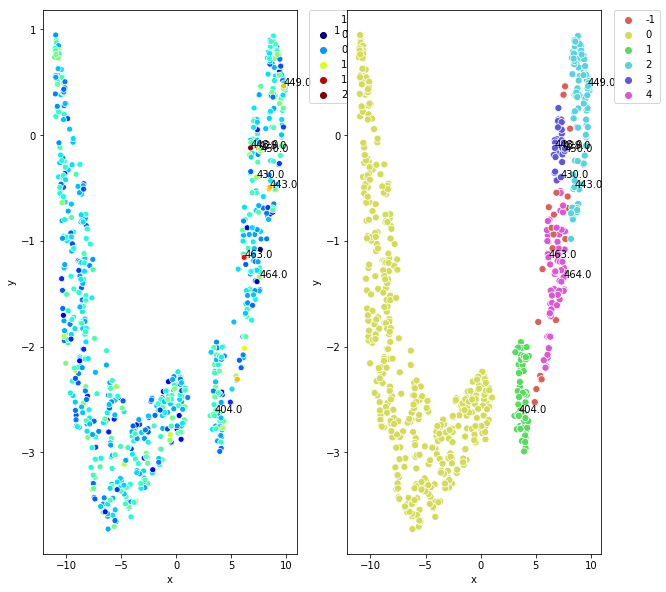

In [85]:
from importlib import reload
# reload(plt)
# %matplotlib notebook
# pred_y-=pred_y.min()
# pred_y[cell_area_list>=40]=-1
cluster_cmp = sns.hls_palette(np.unique(pred_y).shape[0])
labeling_plot_cmp = ['k']
labeling_plot_cmp.extend(cluster_cmp)
# %matplotlib inline
# %matplotlib notebook

import matplotlib.pyplot as plt
# %matplotlib notebook

plt.figure(figsize=(10,10))
# sns.scatterplot(x='x',y='y',hue='mark',data=scatter_pd,size='mark',size_order=[1,0])

# sns.scatterplot(x='x',y='y',hue=pred_y,data=scatter_pd,size='mark',size_order=[1,0],palette=cluster_cmp)
plt.subplot(1,2,1)

sns.scatterplot(x='x',y='y',hue=115,data=scatter_pd,size_order=[1,0],palette='jet')
# sns.scatterplot(x='x',y='y',hue=coc[428,:],data=scatter_pd,size_order=[1,0],s=50)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# plt.savefig('/home/yzy/bioSIMS/tmp/liverfiber_umap.pdf',transparent=True,format='pdf',bbox_inches='tight')

for i,row in scatter_pd.iterrows():
    
    cur_idx = row['i']
    if cur_idx not in mark_list:
        continue
    cur_x = row['x']
    cur_y = row['y']
    plt.annotate(str(cur_idx),(cur_x,cur_y))
# plt.colorbar(use_gridspec=True)




plt.subplot(1,2,2)

# sns.scatterplot(x='x',y='y',hue=87.36,data=scatter_pd,size_order=[1,0],palette='jet')
sns.scatterplot(x='x',y='y',hue=pred_y,data=scatter_pd,size_order=[1,0],palette=cluster_cmp,s=50)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# plt.savefig('/home/yzy/bioSIMS/tmp/liverfiber_umap.pdf',transparent=True,format='pdf',bbox_inches='tight')

for i,row in scatter_pd.iterrows():
    
    cur_idx = row['i']
    if cur_idx not in mark_list:
        continue
    cur_x = row['x']
    cur_y = row['y']
    plt.annotate(str(cur_idx),(cur_x,cur_y))
plt.show()

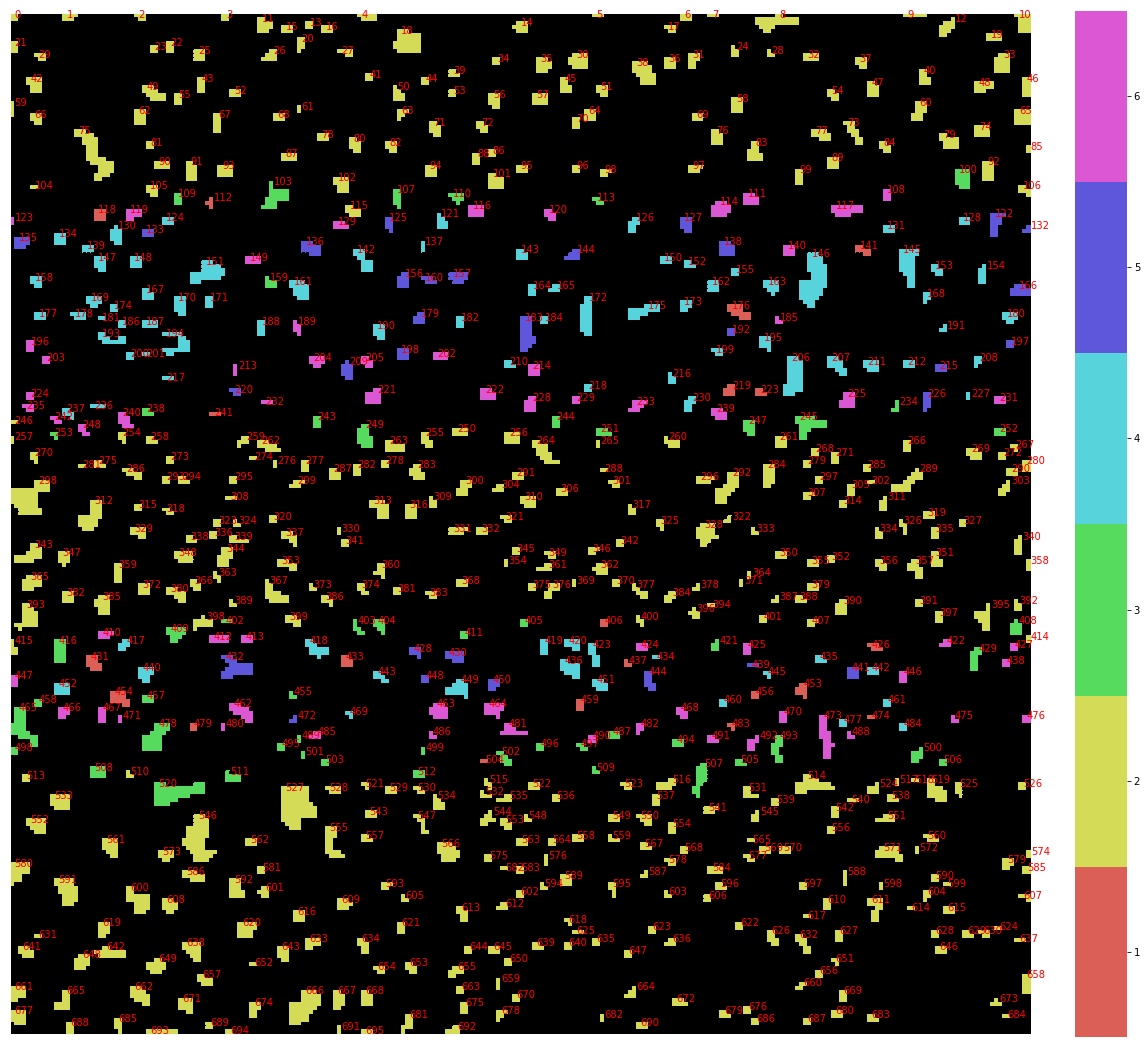

In [86]:
# %matplotlib inline
import matplotlib.pyplot as plt
# uh_pred = hdbscan.HDBSCAN(min_cluster_size=30).fit_predict(rep_embed)
# pred_y = np.ones(shape=(np.max(cell_idx)))
# pred_y = KMeans(3).fit_predict(sim_mat_bak)
# pred_y = SIMLR(sim_mat_bak,-8)
# pred_y = SpectralClustering(4,affinity='precomputed').fit_predict(sim_mat_order_bak)
# pred_y = AgglomerativeClustering(4,affinity='precomputed',linkage='complete').fit_predict(1/(input_sim_mat+1))
to_labeling_pred_y = pred_y.copy()
# to_labeling_pred_y[coc[448,:]>0]=3
# to_labeling_pred_y = resultsLWEA[:,2]
# to_labeling_pred_y = label_list_FF[2]
# to_labeling_pred_y = label_list[3]
# to_labeling_pred_y[mark_list]=2
cluster_cmp = sns.hls_palette(np.unique(to_labeling_pred_y).shape[0])
labeling_plot_cmp = ['k']
labeling_plot_cmp.extend(cluster_cmp)
labeling = get_labeling(to_labeling_pred_y-np.min(to_labeling_pred_y),cell_idx,cell_pos)
# labeling[labeling==5]=0
img1 = labeling.reshape((256,256))
plt.figure(figsize=(20,20))
# plt.imshow(img1)
ticks=np.arange(np.min(img1)+1,np.max(img1)+1)
boundaries = np.arange(np.min(img1)+0.5,np.max(img1)+1.5)
sns.heatmap(img1,cmap=labeling_plot_cmp,square=True,cbar_kws={"ticks":ticks, "boundaries":boundaries,'fraction':0.046,'pad':0.04})
# sns.heatmap(img1,cmap=labeling_plot_cmp,square=True,ad':0.04})

plt.xticks([])
plt.yticks([])
# plt.savefig('/home/yzy/bioSIMS/tmp/liverfiber_cluster.pdf',transparent=True,format='pdf',bbox_inches='tight')

for i in range(num_cells):
    cur_idx = i + 1
    cur_ind = cell_pos[cell_idx==cur_idx][0]
#     print(ind2ij(cur_ind,256,0))
#     print(ind2ij(cur_ind,256,1))
    
    plt.annotate(str(cur_idx-1),(ind2ij(cur_ind,256,1),ind2ij(cur_ind,256,0)),color='red')

    
plt.show()

In [28]:
def plot_with_matplotlib(x_vals, y_vals, labels):
    import matplotlib.pyplot as plt
    import random

    random.seed(0)

    plt.figure(figsize=(12, 12))
    plt.scatter(x_vals, y_vals)

    #
    # Label randomly subsampled 25 data points
    #
    indices = list(range(len(labels)))
    selected_indices = random.sample(indices, 25)
    for i in selected_indices:
        plt.annotate(labels[i], (x_vals[i], y_vals[i]))

In [53]:
word_list = []
embed_list = []
for word in model.wv.vocab:
    word_list.append(word)
    embed_list.append(model.wv[word])
embed_list = np.asarray(embed_list)

In [47]:
embed_list.shape

(65536, 2)

In [54]:
x_vals = embed_list[:,0]
y_vals = embed_list[:,1]
plot_with_matplotlib(x_vals,y_vals,word_list)

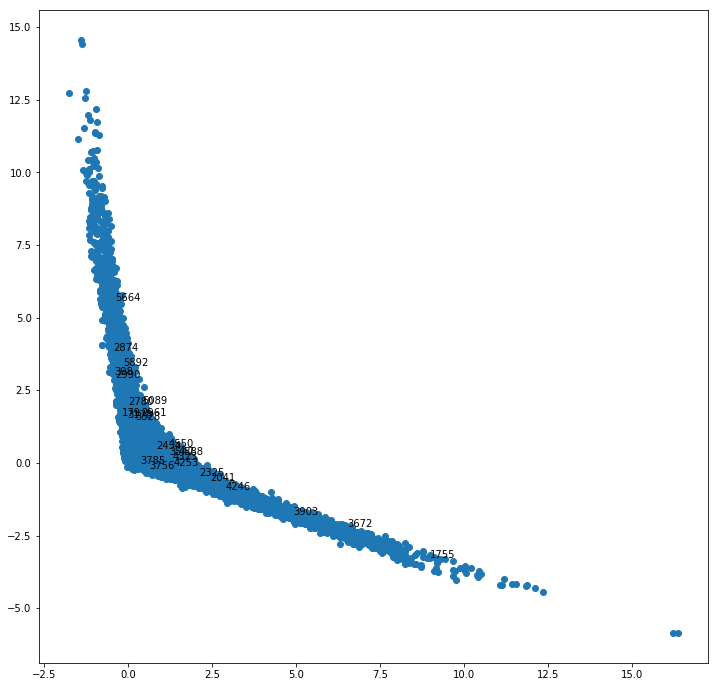

In [55]:
plt.show()